In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 构造数据
np.random.seed(0)
x = np.linspace(-10, 20, 200)
y = 2 * x + 1 + np.random.normal(0, 20, 200)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [5]:
# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)
# 实例化模型
model = LinearRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）并添加权重衰减
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# 训练模型
num_epochs = 1000
train_losses = []
val_losses = []
val_interval = 100

for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch+1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            val_predictions = model(x_tensor)
            val_loss = criterion(val_predictions, y_tensor)
            val_losses.append(val_loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [100/1000], Loss: 40390.9414, Val Loss: 42012.0938
Epoch [200/1000], Loss: 2129980.2500, Val Loss: 2216344.7500
Epoch [300/1000], Loss: 113451040.0000, Val Loss: 118052056.0000
Epoch [400/1000], Loss: 6043901440.0000, Val Loss: 6289017856.0000
Epoch [500/1000], Loss: 321984561152.0000, Val Loss: 335042641920.0000
Epoch [600/1000], Loss: 17153428291584.0000, Val Loss: 17849091358720.0000
Epoch [700/1000], Loss: 913832474050560.0000, Val Loss: 950893411303424.0000
Epoch [800/1000], Loss: 48684231689240576.0000, Val Loss: 50658623860244480.0000
Epoch [900/1000], Loss: 2593592349028253696.0000, Val Loss: 2698777128899444736.0000
Epoch [1000/1000], Loss: 138171588855912726528.0000, Val Loss: 143775245468826599424.0000


In [6]:
# 测试模型
with torch.no_grad():
    predicted = model(x_tensor)

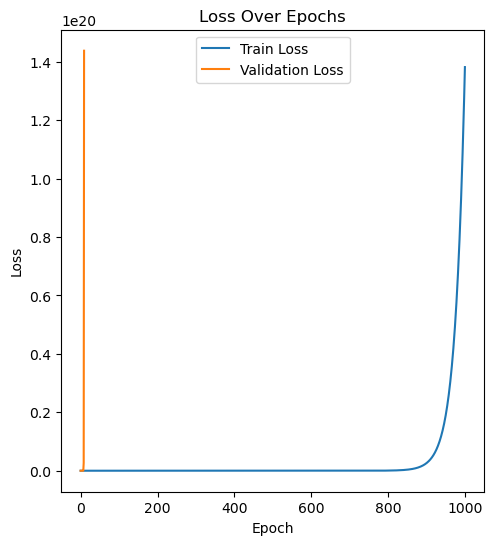

In [7]:
# 绘制训练和验证损失
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


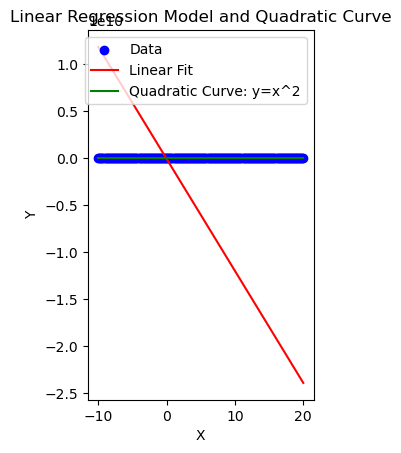

In [8]:
# 绘制原始数据点、拟合直线和一元二次曲线
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Data')  # 绘制原始数据点
plt.plot(x, predicted.numpy(), color='red', label='Linear Fit')  # 绘制拟合直线
plt.plot(x, x**2, color='green', label='Quadratic Curve: y=x^2')  # 绘制一元二次曲线
plt.title('Linear Regression Model and Quadratic Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()